## Introduction

This project is intended to be viewed as a showcase of dataset manipulation and graphical visualization using Python packages. There are two questions relevant to the data that I attempt to answer. As we will see, the datasets explored here have a very specific terminology and structure and, as such, I had to tailor the questions in a way that reflects the datasets' specifications.

The area examined by the datasets consists of England and Wales, and the two questions are:

- Did household crime overall have a higher incidence rate in households of unemployed adults than in those of employed adults?

- How did the household crime incidence rate in urban areas change from 2019 to 2022?

The data are separated into two datasets available on the official website of the British Office of National Statistics, each providing estimates for household crime for a certain period of time. They are the product of the  Crime Survey for England and Wales (CseW). You can find the datasets at [this address](https://www.ons.gov.uk/peoplepopulationandcommunity/crimeandjustice/datasets/householdcrimeincidencecsewopendatatable/current).

The datasets' specifications are very distinct and without their supporting documentation (which is part of the zip file of each dataset) any uninformed manipulation risks severely distorting any future conclusions one might draw. For example, while it initially appears as if each dataset concerns the 4rth quarter of 2019 and 2022 respectively, the instructions state that:

> *"The combination of LastYear and LastQuarter identifies the last quarter of interviews covered. For example, LastYear = ‘2014’ and LastQuarter = ‘4’ denotes that the estimate is based on the 12 months of CseW interviews between January 2014 and December 2014 – i.e. the 12 months ending in quarter 4 of 2014."*

Thus, we can understand that the two datasets cover the entire two years of 2019 and 2022 (note that there were no surveys for the years 2020 and 2021 because of the COVID-19 pandemic). Throughout this project, I will attempt to give all the information necessary for the viewer to understand the variables and estimates of the datasets, but some consultation of the supporting guides would be beneficial nonetheless.

To begin with, the first step is to explore the datasets and understand their encoding, and then attempt to simplify them.

## 1. Dataset Exploration and Manipulation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
# Datasets to Dataframes
data2022 = pd.read_csv(r"Household crime_Incidence_England and Wales_2022Q4.csv")
data2019 = pd.read_csv(r"Household crime_Incidence_England and Wales_2019Q4.csv")

In [3]:
all_data_list = [data2019, data2022]

# Check if both datasets have the same columns
if all([set(all_data_list[0].columns) == set(df.columns) for df in all_data_list]):
    print('All DataFrames have the same columns')
else:
    print('Some DataFrames have different columns')

All DataFrames have the same columns


In [4]:
data2019.tail()

,Year,Quarter,MeasurementVar,MeasurementLevel,MeasurementType,Geography,HouseholdType,Sex,Age,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2407,2019,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,Total,Total,41.557029,1.565192,34923
2408,2019,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,"36,400-51,999",39.303736,4.581048,3697
2409,2019,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,"50,000 or more",30.466761,17.609007,120
2410,2019,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,No income stated or not enough information pro...,33.411248,4.221535,4932
2411,2019,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,"Up to £5,199",49.828408,13.668267,604


In [5]:
data2022.tail()

,Year,Quarter,MeasurementVar,MeasurementLevel,MeasurementType,Geography,HouseholdType,Sex,Age,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2515,2022,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,"31,200-41,599",32.189911,5.858593,2946
2516,2022,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,"41,600 -51,999",32.669006,5.439164,2482
2517,2022,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,"52,000 or more",26.294629,3.155669,5402
2518,2022,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,No income stated or not enough information pro...,24.182275,14.377626,392
2519,2022,4,vandal_i,Household,Incidence rate,England and Wales,All households,,,tothhin4,"Up to 10,399",29.783604,7.403479,2030


As we can see, both datasets have the same columns. The columns "Year" and "Quarter" were explained in the introduction of this project. The columns "MeasurementVar", "CharacteristicVar" and "Characteristic" basically serve to inform the "Estimate" column: "MeasurementVar" consists of variables which are essentially descriptions of a crime committed (f.e. "Burglary in dwelling with entry), "Characteristic" identifies respondent (a.k.a victim) characteristics that the estimate relates to, and "CharacteristicVar" values are basically groupings of characteristics based on a specific variable (f.e. age group or region).

The "MeasurementLevel" and "MeasurementType" columns seem to consist of only one value (verified below) and inform us that the level of the estimate is "household" as opposed to "person", while the type of the estimate is "incidence rate" as opposed to crime "prevalence". To clarify further, what the datasets refer to as an "Estimate" of an "Incidence rate" is the number of crimes per 1,000 households, i.e., an estimate of 25 means that that specific crime happens in 25 out of 1000 households.

While the rest of the columns seem to be self-explanatory, it is worth noting that the column "UnweightedCount" refers to the *"total number of respondents who contributed to the calculation of Estimate"*. As such, the number only serves to inform the robustness of the estimate (the bigger the better) and has no value on its own.

Next, we will explore whether there are any differences in the two datasets' variable columns, so as to be sure that the same variables and groups exist in both:

In [6]:
# Dataframe names used in the following loop for purely cosmetic reasons
data2019.name = 'data2019'
data2022.name = 'data2022'

# Check MeasurementVar column
if data2022["MeasurementVar"].unique().all() == data2019["MeasurementVar"].unique().all():
    print(f"The {data2022.name} DataFrame \
has the same 'MeasurementVar' values as Dataframe {data2019.name}.")
else:
    print(f"The {data2022.name} DataFrame \
has different 'MeasurementVar' values from Dataframe {data2019.name}.") 

The data2022 DataFrame has the same 'MeasurementVar' values as Dataframe data2019.


In [7]:
# Check Characteristics column
if data2022["Characteristic"].unique().all() == data2019["Characteristic"].unique().all():
    print(f"The {data2022.name} DataFrame \
has the same 'Characteristic' values as Dataframe {data2019.name}.")
else:
    print(f"The {data2022.name} DataFrame \
has different 'Characteristic' values from Dataframe {data2019.name}.")  

The data2022 DataFrame has different 'Characteristic' values from Dataframe data2019.


In [8]:
# Check which characteristics are different
set(data2022["Characteristic"]) - set(data2019["Characteristic"])

{'10,400 -20,799',
 '20,800 -31,199',
 '31,200-41,599',
 '41,600 -51,999',
 '52,000 or more',
 'Up to 10,399'}

In [9]:
set(data2019["Characteristic"]) - set(data2022["Characteristic"])

{'36,400-51,999', '50,000 or more', 'Up to £5,199'}

It appears that the above respondent characteristics, apparently relevant to household income, were categorized differently in 2019 and 2022. All we can do to remedy this is to drop these characteristics altogether from both datasets so as to avoid any misrepresentations later on. By dropping them, the equivalent "CharacteristicVar" values should logically be dropped as well:

In [10]:
data2022.drop(data2022.index[data2022.Characteristic.isin(["10,400 -20,799", "20,800 -31,199",
                                                           "31,200-41,599", "41,600 -51,999",
                                                           "52,000 or more", "Up to 10,399"])], inplace=True)


data2019.drop(data2019.index[data2019.Characteristic.isin(["36,400-51,999", "50,000 or more", 
                                                           "Up to £5,199"])], inplace=True)

In [11]:
# Check again
if data2022["Characteristic"].unique().all() == data2019["Characteristic"].unique().all():
    print(f"The {data2022.name} DataFrame \
has the same 'Characteristic' values as Dataframe {data2019.name}.")
else:
    print(f"The {data2022.name} DataFrame \
 has different 'Characteristic' values from Dataframe {data2019.name}.")  

The data2022 DataFrame has the same 'Characteristic' values as Dataframe data2019.


In [12]:
# Check for final CharacteristicVar Column
if data2022["CharacteristicVar"].unique().all() == data2019["CharacteristicVar"].unique().all():
    print(f"The {data2022.name} DataFrame \
has the same 'CharacteristicVar' values as Dataframe {data2019.name}.")
else:
    print(f"The {data2022.name} DataFrame \
has different 'CharacteristicVar' values from Dataframe {data2019.name}.") 

The data2022 DataFrame has the same 'CharacteristicVar' values as Dataframe data2019.


As expected, the "CharacteristicVar" variable related to income was also dropped. Now to create one Dataframe for both years:

In [13]:
# Concatenate all Dataframes
data2019_2022 = pd.concat(all_data_list, verify_integrity=True, ignore_index=True)

In [14]:
data2019_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4608 entries, 0 to 4607
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4608 non-null   int64  
 1   Quarter            4608 non-null   int64  
 2   MeasurementVar     4608 non-null   object 
 3   MeasurementLevel   4608 non-null   object 
 4   MeasurementType    4608 non-null   object 
 5   Geography          4608 non-null   object 
 6   HouseholdType      4608 non-null   object 
 7   Sex                4608 non-null   object 
 8   Age                4608 non-null   object 
 9   CharacteristicVar  4608 non-null   object 
 10  Characteristic     4608 non-null   object 
 11  Estimate           4608 non-null   float64
 12  StandardError      4608 non-null   float64
 13  UnweightedCount    4608 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 504.1+ KB


In [15]:
# Check for NaN
data2019_2022.isna().any()

Year                 False
Quarter              False
MeasurementVar       False
MeasurementLevel     False
MeasurementType      False
Geography            False
HouseholdType        False
Sex                  False
Age                  False
CharacteristicVar    False
Characteristic       False
Estimate             False
StandardError        False
UnweightedCount      False
dtype: bool

In [16]:
data2019_2022.describe(include="all")

,Year,Quarter,MeasurementVar,MeasurementLevel,MeasurementType,Geography,HouseholdType,Sex,Age,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
count,4608.000000,4608.0,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608.000000,4608.000000,4608.000000
unique,NaN,NaN,29,1,1,1,3,1,1,15,64,NaN,NaN,NaN
top,NaN,NaN,allmvc_i,Household,Incidence rate,England and Wales,All households,,,gor,Detached house,NaN,NaN,NaN
freq,NaN,NaN,256,4608,4608,4608,3712,4608,4608,792,72,NaN,NaN,NaN
mean,2020.500000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.049081,3.833981,7041.447049
std,1.500163,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.689772,6.408723,7640.021905
min,2019.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,16.000000
25%,2019.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.173549,1.058113,1834.000000
50%,2020.500000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.771045,2.058472,4513.000000
75%,2022.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.078682,4.200521,8138.000000


In [17]:
for column in data2019_2022.columns:
    if len(data2019_2022[column].unique()) == 1:
        print(f" The {column} column has only one value.")    

 The Quarter column has only one value.
 The MeasurementLevel column has only one value.
 The MeasurementType column has only one value.
 The Geography column has only one value.
 The Sex column has only one value.
 The Age column has only one value.


As I suspected, certain columns have only one value or no values at all, and are therefore redundant. 

In [18]:
# Drop single value columns
for column in data2019_2022.columns:
    if len(data2019_2022[column].unique()) == 1:
        data2019_2022.drop(column, axis=1, inplace=True)  

In [19]:
# Check for duplicates
data2019_2022.duplicated().any()

False

In [20]:
data2019_2022

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
0,2019,albenl_i,All households,accharm3,Detached house,4.173878,0.859574,8597
1,2019,albenl_i,All households,accharm3,Flats/maisonettes,6.072602,1.586240,5241
2,2019,albenl_i,All households,accharm3,House,3.926507,0.431688,29499
3,2019,albenl_i,All households,accharm3,Other accommodation,0.000000,0.000000,83
4,2019,albenl_i,All households,accharm3,Semi-detached house,3.199902,0.641620,10767
...,...,...,...,...,...,...,...,...
4603,2022,vandal_i,All households,tenharm,Private rented sector,32.254594,4.176749,4509
4604,2022,vandal_i,All households,tenharm,Renters,40.865940,3.774295,8456
4605,2022,vandal_i,All households,tenharm,Social rented sector,51.508175,6.669503,3947
4606,2022,vandal_i,All households,Total,Total,30.135285,1.800354,26313


In [21]:
# Check what HouseholdType column consists of
data2019_2022["HouseholdType"].unique()

array(['All households', 'Vehicle-owning households',
       'Bicycle-owning households'], dtype=object)

In [22]:
# Check what CharacteristicVar column consists of
data2019_2022["CharacteristicVar"].unique()

array(['accharm3', 'depremp15', 'gor', 'h10sec4a', 'hemploy2a', 'hrpage7',
       'hrpsex', 'incivgrp', 'oa_sup11', 'rural3', 'struct4', 'tenharm',
       'Total', 'tothhin4', 'depremp19'], dtype=object)

In [23]:
# Check what MeasurementVar column consists of
data2019_2022["MeasurementVar"].unique()

array(['albenl_i', 'albuel_i', 'albura_i', 'albure_i', 'alburg_i',
       'allmvc_i', 'allmvt_i', 'attmvt_i', 'biketh_i', 'bndenl_i',
       'brndel_i', 'burdnl_i', 'burgat_i', 'burgen_i', 'burgla_i',
       'burglo_i', 'burgnd_i', 'burnda_i', 'burnde_i', 'homeva_i',
       'mv.van_i', 'othht_i', 'theftf_i', 'thefto_i', 'thftdm_i',
       'thfthh_i', 'thftod_i', 'totalh_i', 'vandal_i'], dtype=object)

As explained above, the column "MeasurementVar" consists of variables that are essentially descriptions of crimes committed. Up next, I will create a dictionary to rename the values of "MeasurementVar" for clarity in the visualizations. Since the "CharacteristicVar" is only used in the code, I will refrain from doing the same for it. Instead, I will just mention here that the two characteristic variables of interest to us in order to answer our questions are the 'hemploy2a' variable, which refers to the respondents' employment status, and the 'rural3' variable, which refers to the type of area the household examined is located in, rural or urban.

In [24]:
renaming_crime_dict = {"albenl_i":"Domestic burglary with entry and no loss",
                       "albuel_i":"Domestic burglary with entry and loss",
                       "albura_i":"Attempted domestic burglary",
                       "albure_i":"Domestic burglary with entry", 
                       "alburg_i":"Domestic burglary",
                       "allmvc_i":"All vehicle crime", 
                       "allmvt_i":"All vehicle-related theft", 
                       "attmvt_i":"Attempted theft of and from vehicles", 
                       "biketh_i":"Bicycle theft",
                       "bndenl_i":"Burglary in building other than dwelling with entry and no loss",
                       "brndel_i":"Burglary in building other than dwelling with entry and loss", 
                       "burdnl_i":"Burglary in dwelling with no loss", 
                       "burgat_i":"Attempted burglary in dwelling", 
                       "burgen_i":"Burglary in dwelling with entry",
                       "burgla_i":"Burglary in dwelling",
                       "burglo_i":"Burglary in dwelling with loss",
                       "burgnd_i":"Burglary in building other than dwelling",
                       "burnda_i":"Attempted burglary in building other than dwelling",
                       "burnde_i":"Burglary in building other than dwelling with entry",
                       "homeva_i":"Arson and other criminal damage",
                       "mv.van_i":"Criminal damage to a vehicle",
                       "othht_i":"Other household theft",
                       "theftf_i":"Theft from a motor vehicle",
                       "thefto_i":"Theft of a motor vehicle",
                       "thftdm_i":"Theft from a dwelling and meter",
                       "thfthh_i":"All household theft",
                       "thftod_i":"Theft from outside dwelling",
                       "totalh_i":"All household crime",
                       "vandal_i":"Criminal damage  "}

In [25]:
data2019_2022["MeasurementVar"].replace(renaming_crime_dict, inplace=True)

In [26]:
data2019_2022

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
0,2019,Domestic burglary with entry and no loss,All households,accharm3,Detached house,4.173878,0.859574,8597
1,2019,Domestic burglary with entry and no loss,All households,accharm3,Flats/maisonettes,6.072602,1.586240,5241
2,2019,Domestic burglary with entry and no loss,All households,accharm3,House,3.926507,0.431688,29499
3,2019,Domestic burglary with entry and no loss,All households,accharm3,Other accommodation,0.000000,0.000000,83
4,2019,Domestic burglary with entry and no loss,All households,accharm3,Semi-detached house,3.199902,0.641620,10767
...,...,...,...,...,...,...,...,...
4603,2022,Criminal damage,All households,tenharm,Private rented sector,32.254594,4.176749,4509
4604,2022,Criminal damage,All households,tenharm,Renters,40.865940,3.774295,8456
4605,2022,Criminal damage,All households,tenharm,Social rented sector,51.508175,6.669503,3947
4606,2022,Criminal damage,All households,Total,Total,30.135285,1.800354,26313


At this point, we should take heed of the following warning that exists in the user guide:

> *"It is recommended that users refrain from using estimates based on fewer than 50 respondents. They have been included here, where the unweighted base is greater than 10, for reference purposes."*

Therefore, any estimate based on fewer than 50 respondents is unreliable. We will search for and drop all rows with an "UnweightedCount" value less than 50.

In [27]:
# Check if any row has "UnweightedCount" lower than 50 
(data2019_2022["UnweightedCount"] <= 50).any()

True

In [28]:
data2019_2022.loc[data2019_2022["UnweightedCount"] <= 50]

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
771,2019,Bicycle theft,Bicycle-owning households,accharm3,Other accommodation,0.000000,0.000000,23
2691,2022,All vehicle crime,Vehicle-owning households,accharm3,Other accommodation,16.878548,16.859356,48
2819,2022,All vehicle-related theft,Vehicle-owning households,accharm3,Other accommodation,16.878548,16.859356,48
2947,2022,Attempted theft of and from vehicles,Vehicle-owning households,accharm3,Other accommodation,0.000000,0.000000,48
3075,2022,Bicycle theft,Bicycle-owning households,accharm3,Other accommodation,0.000000,0.000000,16
3907,2022,Criminal damage to a vehicle,Vehicle-owning households,accharm3,Other accommodation,0.000000,0.000000,48
4099,2022,Theft from a motor vehicle,Vehicle-owning households,accharm3,Other accommodation,16.878548,16.859356,48
4227,2022,Theft of a motor vehicle,Vehicle-owning households,accharm3,Other accommodation,0.000000,0.000000,48


In [29]:
# Delete rows with unreliable data
data2019_2022.drop([771, 2691, 2819, 2947,
                    3075, 3907, 4099, 4227], axis=0, inplace=True)

In [30]:
(data2019_2022["UnweightedCount"] <= 50).any()

False

Now that the unreliable estimates have been removed and all the data are clean in one Dataframe, we can begin to consider the answers to our questions.

## 2. Did household crime have a higher incidence rate in households of unemployed adults than in those of employed adults?

To answer our first question, we will focus on the "CharacteristicVar" variable which categorizes respondents by employment status, the 'hemploy2a' variable. Since our question includes all the household types, we will also select the data with "All Households" as their "HouseholdType".

In [31]:
# select employment status characteristics from CharacteristicVar and "All households" from HouseholdType 
employment_status = data2019_2022.groupby("CharacteristicVar").get_group("hemploy2a")
employment_status_all_households = employment_status.groupby("HouseholdType").get_group("All households")
employment_status_all_households

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
26,2019,Domestic burglary with entry and no loss,All households,hemploy2a,Economically inactive,4.396495,0.701776,12856
27,2019,Domestic burglary with entry and no loss,All households,hemploy2a,Economically inactive: long-term/temp sick/ill,11.576880,3.008303,1454
28,2019,Domestic burglary with entry and no loss,All households,hemploy2a,Economically inactive: looking after family/home,14.161843,5.468194,845
29,2019,Domestic burglary with entry and no loss,All households,hemploy2a,Economically inactive: other,0.000000,0.000000,284
30,2019,Domestic burglary with entry and no loss,All households,hemploy2a,Economically inactive: retired,2.750404,0.617991,9981
...,...,...,...,...,...,...,...,...
4573,2022,Criminal damage,All households,hemploy2a,Economically inactive: other,12.808818,6.406504,333
4574,2022,Criminal damage,All households,hemploy2a,Economically inactive: retired,17.483931,2.464213,8128
4575,2022,Criminal damage,All households,hemploy2a,Economically inactive: student,41.803734,19.168555,216
4576,2022,Criminal damage,All households,hemploy2a,Employed,33.079445,2.277919,15670


Next, we will visualize all "MeasurementVar" variables to get a better overall sense of how the 2019 data compares to the 2022 data:

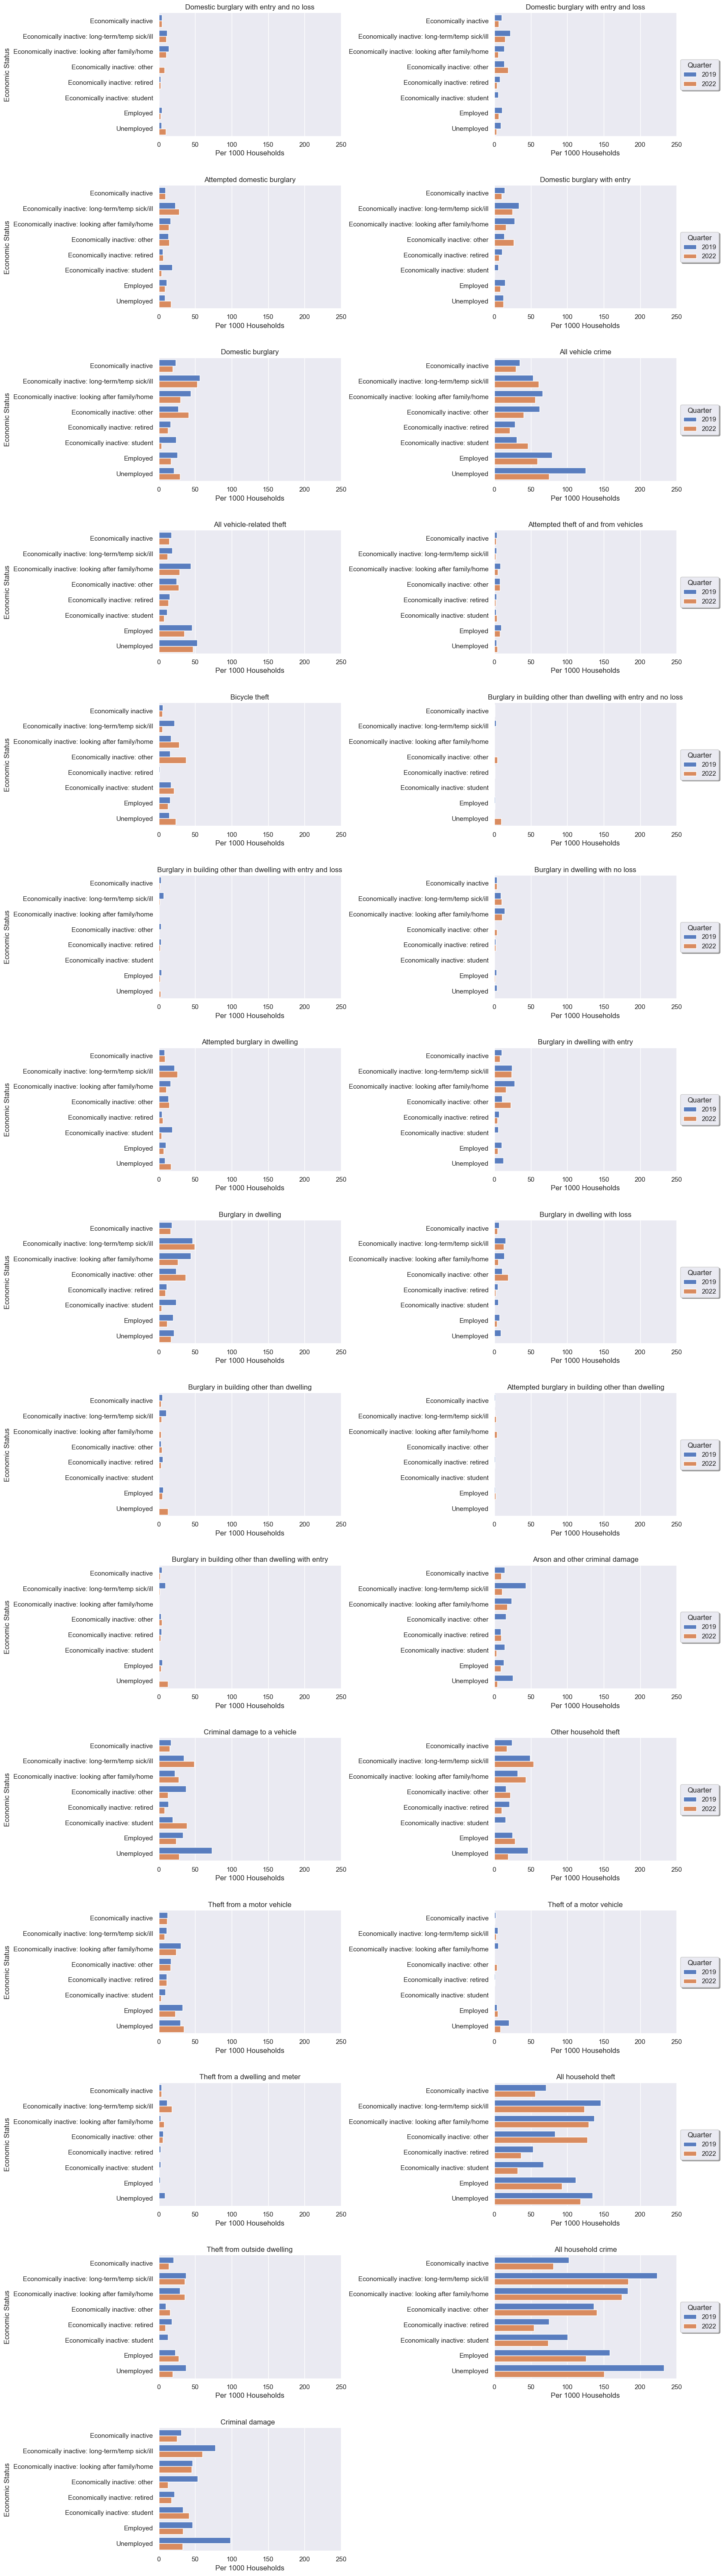

In [32]:
# Visualization of every MeasurementVar and Employment status variable rates
all_vars = sns.catplot(employment_status_all_households, y="Characteristic", 
                       x="Estimate", kind="bar", col="MeasurementVar", 
                       col_wrap=2, height=4, aspect=2, hue='Year', orient="h",
                       palette="muted", sharex=False, sharey=False, legend=None).set(xlim=(0, 250))

all_vars.set_titles("{col_name}")
all_vars.set_axis_labels("Per 1000 Households", "Economic Status")
for ax in all_vars.axes.flatten():
    ax.set_xlabel("Per 1000 Households")
for ax in all_vars.axes.flatten()[1::2]:    
    ax.legend(title="Quarter", fancybox=True, shadow=True, frameon=True, 
              loc="lower right", bbox_to_anchor=(1.25, 0.35))
plt.subplots_adjust(hspace=0.4)

The above visualization is a bit confusing. To make things clearer, we will focus on the "MeasurementVar" variable which seems to be the actual overall estimate of household crime incidence rates, namely the "All household crime" variable.

However, there is also the additional issue of the standard error of the survey. Depicting a custom standard error (as opposed to a classic normal distribution standard error or a confidence interval) with the high-level functions and objects of seaborn is perhaps more complicated than it should be, and as such, we will instead use Pandas' plotting methods to clearly depict the standard error and avoid any misinterpretations.

In [33]:
# Dataframe view of "All household crime" MeasurementVar by employment characteristics 
employment_status_totals = employment_status_all_households.groupby("MeasurementVar").get_group("All household crime")
employment_status_totals

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2202,2019,All household crime,All households,hemploy2a,Economically inactive,102.001906,4.107431,12856
2203,2019,All household crime,All households,hemploy2a,Economically inactive: long-term/temp sick/ill,223.367322,20.004599,1454
2204,2019,All household crime,All households,hemploy2a,Economically inactive: looking after family/home,183.235304,20.627687,845
2205,2019,All household crime,All households,hemploy2a,Economically inactive: other,136.767307,27.628866,284
2206,2019,All household crime,All households,hemploy2a,Economically inactive: retired,75.119884,3.874917,9981
2207,2019,All household crime,All households,hemploy2a,Economically inactive: student,100.651289,20.193295,292
2208,2019,All household crime,All households,hemploy2a,Employed,158.226029,3.992042,21595
2209,2019,All household crime,All households,hemploy2a,Unemployed,232.847752,44.457995,379
4506,2022,All household crime,All households,hemploy2a,Economically inactive,81.103674,5.211796,10354
4507,2022,All household crime,All households,hemploy2a,Economically inactive: long-term/temp sick/ill,183.506912,25.702087,1178


In [34]:
# separation into 2019 and 2022 
employment_status_2019 = employment_status_totals.loc[employment_status_totals["Year"] == 2019]
employment_status_2022 = employment_status_totals.loc[employment_status_totals["Year"] == 2022]

In [35]:
# For aesthetic purposes
print(sns.color_palette("muted").as_hex())

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


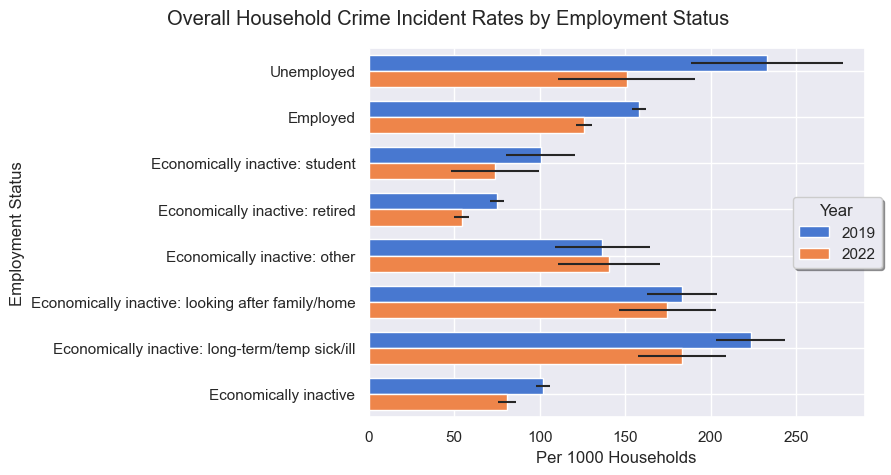

In [36]:
# Plot 2019 and 2022 bars for "All household crime" variable with error bars by employment status characteristic

fig = plt.figure()

ax = plt.axes()

employment_status_2019.plot.barh(y="Estimate", x="Characteristic", xerr="StandardError", 
                                 width=0.35, ax=ax, position=0, color="#4878d0", label="2019")
employment_status_2022.plot.barh(y="Estimate", x="Characteristic", xerr="StandardError", 
                                 width=0.35, ax=ax,  position=1, color="#ee854a", label="2022")
plt.ylim([-0.5, 7.5])
ax.legend(title="Year", fancybox=True, shadow=True, loc="center right", bbox_to_anchor=(1.05, 0.5))
ax.set_xlabel("Per 1000 Households")
ax.set_ylabel("Employment Status")
ax.set(xlim=(0, 290))

fig.suptitle("Overall Household Crime Incident Rates by Employment Status", y=0.96, x=0.25);

We can see that, overall, there is a drop in incidence rates in 2022 in most of the categories of respondents that interest us. One exception is the variable "Economically inactive: other", where a small increase can be noticed in the estimate itself.

On the other hand, what becomes evident in this visualization is that without the depictions of the standard error, the graph can be misleading. For example, the standard error for households with unemployed adults is massive (44 and 39 respectively for 2019 and 2022). That is because the UnweightedCount in that category is very low, which implies that there was a somewhat insufficient number of unemployed respondents in the survey.

As such, it is important to take the standard error into account as we finally arrive at the answer to the first question:

In [37]:
employment_status_2019

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2202,2019,All household crime,All households,hemploy2a,Economically inactive,102.001906,4.107431,12856
2203,2019,All household crime,All households,hemploy2a,Economically inactive: long-term/temp sick/ill,223.367322,20.004599,1454
2204,2019,All household crime,All households,hemploy2a,Economically inactive: looking after family/home,183.235304,20.627687,845
2205,2019,All household crime,All households,hemploy2a,Economically inactive: other,136.767307,27.628866,284
2206,2019,All household crime,All households,hemploy2a,Economically inactive: retired,75.119884,3.874917,9981
2207,2019,All household crime,All households,hemploy2a,Economically inactive: student,100.651289,20.193295,292
2208,2019,All household crime,All households,hemploy2a,Employed,158.226029,3.992042,21595
2209,2019,All household crime,All households,hemploy2a,Unemployed,232.847752,44.457995,379


### Variables for Answer:

In [38]:
# Rates, standard error and rates +- standard error for Households of *unemployed* adults in 2019
unemployed_2019 = employment_status_2019.query('Characteristic == "Unemployed"')
unemployed_estimate_2019 = int(unemployed_2019["Estimate"].values)
unemployed_standard_error_2019 = int(unemployed_2019["StandardError"].values)
unemployed_lower_se_2019 = unemployed_estimate_2019 - unemployed_standard_error_2019
unemployed_upper_se_2019 = unemployed_estimate_2019 + unemployed_standard_error_2019
unemployed_2019

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2209,2019,All household crime,All households,hemploy2a,Unemployed,232.847752,44.457995,379


In [39]:
# Rates, standard error and rates +- standard error for Households of *unemployed* adults in 2022
unemployed_2022 = employment_status_2022.query('Characteristic == "Unemployed"')
unemployed_estimate_2022 = int(unemployed_2022["Estimate"].values)
unemployed_standard_error_2022 = int(unemployed_2022["StandardError"].values)
unemployed_lower_se_2022 = unemployed_estimate_2022 - unemployed_standard_error_2022
unemployed_upper_se_2022 = unemployed_estimate_2022 + unemployed_standard_error_2022
unemployed_2022

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
4513,2022,All household crime,All households,hemploy2a,Unemployed,150.832231,39.886969,209


In [40]:
# Rates, standard error and rates +- standard error for Households of *employed* adults in 2019
employed_2019 = employment_status_2019.query('Characteristic == "Employed"')
employed_estimate_2019 = int(employed_2019["Estimate"].values)
employed_standard_error_2019 = int(employed_2019["StandardError"].values)
employed_lower_se_2019 = employed_estimate_2019 - employed_standard_error_2019
employed_upper_se_2019 = employed_estimate_2019 + employed_standard_error_2019
employed_2019 

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2208,2019,All household crime,All households,hemploy2a,Employed,158.226029,3.992042,21595


In [41]:
# Rates, standard error and rates +- standard error for Households of *employed* adults in 2022
employed_2022 = employment_status_2022.query('Characteristic == "Employed"')
employed_estimate_2022 = int(employed_2022["Estimate"].values)
employed_standard_error_2022 = int(employed_2022["StandardError"].values)
employed_lower_se_2022 = employed_estimate_2022 - employed_standard_error_2022
employed_upper_se_2022 = employed_estimate_2022 + employed_standard_error_2022
employed_2022 

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
4512,2022,All household crime,All households,hemploy2a,Employed,125.995041,4.714988,15670


### Answer:

In [42]:
# Question 1: Answer part 1
print(f"The household crime incidence rate of households with unemployed adults was \
{unemployed_estimate_2019} per 1000 households in the year {int(unemployed_2019['Year'].values)}, with a standard error \
of {unemployed_standard_error_2019}. Similarly, in {int(unemployed_2022['Year'].values)}, \
the rate was {unemployed_estimate_2022} with a standard error of {unemployed_standard_error_2022}. \
The equivalent rates for \nhouseholds with employed adults was {employed_estimate_2019} \
per 1000 households in {int(employed_2019['Year'].values)}, with a standard error of {employed_standard_error_2019}, \
and {employed_estimate_2022} with \na standard error of {employed_standard_error_2022} \
in {int(employed_2022['Year'].values)}.")

The household crime incidence rate of households with unemployed adults was 232 per 1000 households in the year 2019, with a standard error of 44. Similarly, in 2022, the rate was 150 with a standard error of 39. The equivalent rates for 
households with employed adults was 158 per 1000 households in 2019, with a standard error of 3, and 125 with 
a standard error of 4 in 2022.


In [43]:
# Question 1: Answer part 2
print(f"For the year 2019, we can be sure that the household crime incidence rate was much higher in households of \
unemployed \nadults than in households of employed adults, since, taking into account the standard error, the lowest \
possible rate for\nhouseholds of unemployed adults was {unemployed_lower_se_2019} per 1000 households, while the \
highest possible rate for households of employed \nadults was {employed_upper_se_2019} per 1000. \n\nOn the other \
hand, the image isn't as clear for 2022, where the lowest possible rate for households of unemployed adults \nwas \
{unemployed_lower_se_2022} per 1000 households, while the highest possible rate for households of employed \
adults was {employed_upper_se_2022} per 1000 \nhouseholds. As such, there is the possibility that the rate in \
households of unemployed adults could be lower than or \nequal to the equivalent rate for households of \
employed adults.\n\nMore specifically, there is a \
{100 - (round((employed_upper_se_2022- unemployed_lower_se_2022)/(unemployed_standard_error_2022*2)*100,2))}% chance \
that the household crime rate in households of unemployed adults was higher \nthan the same rate in households of \
employed adults, and a \
{round((employed_upper_se_2022- unemployed_lower_se_2022)/(unemployed_standard_error_2022*2)*100,2)}% chance that \
it was equal or lower.")

For the year 2019, we can be sure that the household crime incidence rate was much higher in households of unemployed 
adults than in households of employed adults, since, taking into account the standard error, the lowest possible rate for
households of unemployed adults was 188 per 1000 households, while the highest possible rate for households of employed 
adults was 161 per 1000. 

On the other hand, the image isn't as clear for 2022, where the lowest possible rate for households of unemployed adults 
was 111 per 1000 households, while the highest possible rate for households of employed adults was 129 per 1000 
households. As such, there is the possibility that the rate in households of unemployed adults could be lower than or 
equal to the equivalent rate for households of employed adults.

More specifically, there is a 76.92% chance that the household crime rate in households of unemployed adults was higher 
than the same rate in households of employed adults, and a 23.08% chanc

Obviously, any deeper analysis of the above observations or any attempt to identify factors behind them would require extensive background research, far beyond the scope of this project.

## 3. How did the household crime incidence rate in urban areas change from 2019 to 2022?

Moving on to the second question, we will follow a similar method as we did in the first. We will first select the relevant characteristics and then move on to view all "MeasurementVar" variables before finally visualizing the overall rates.

In [44]:
# select area type of CharacteristicVar category and "All households" variable of HouseholdType
area_type = data2019_2022.groupby("CharacteristicVar").get_group("rural3")
area_all_households = area_type.loc[area_type["HouseholdType"] == "All households"]
area_all_households

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
53,2019,Domestic burglary with entry and no loss,All households,rural3,Rural,4.338858,0.958726,7646
54,2019,Domestic burglary with entry and no loss,All households,rural3,Urban,4.250119,0.501343,27277
117,2019,Domestic burglary with entry and loss,All households,rural3,Rural,5.868520,0.924160,7646
118,2019,Domestic burglary with entry and loss,All households,rural3,Urban,11.474665,0.814630,27277
181,2019,Attempted domestic burglary,All households,rural3,Rural,7.111370,1.126597,7646
...,...,...,...,...,...,...,...,...
4470,2022,Theft from outside dwelling,All households,rural3,Urban,23.933356,1.518177,20516
4533,2022,All household crime,All households,rural3,Rural,73.257137,7.079152,5797
4534,2022,All household crime,All households,rural3,Urban,118.965400,4.264908,20516
4597,2022,Criminal damage,All households,rural3,Rural,20.930724,2.896462,5797


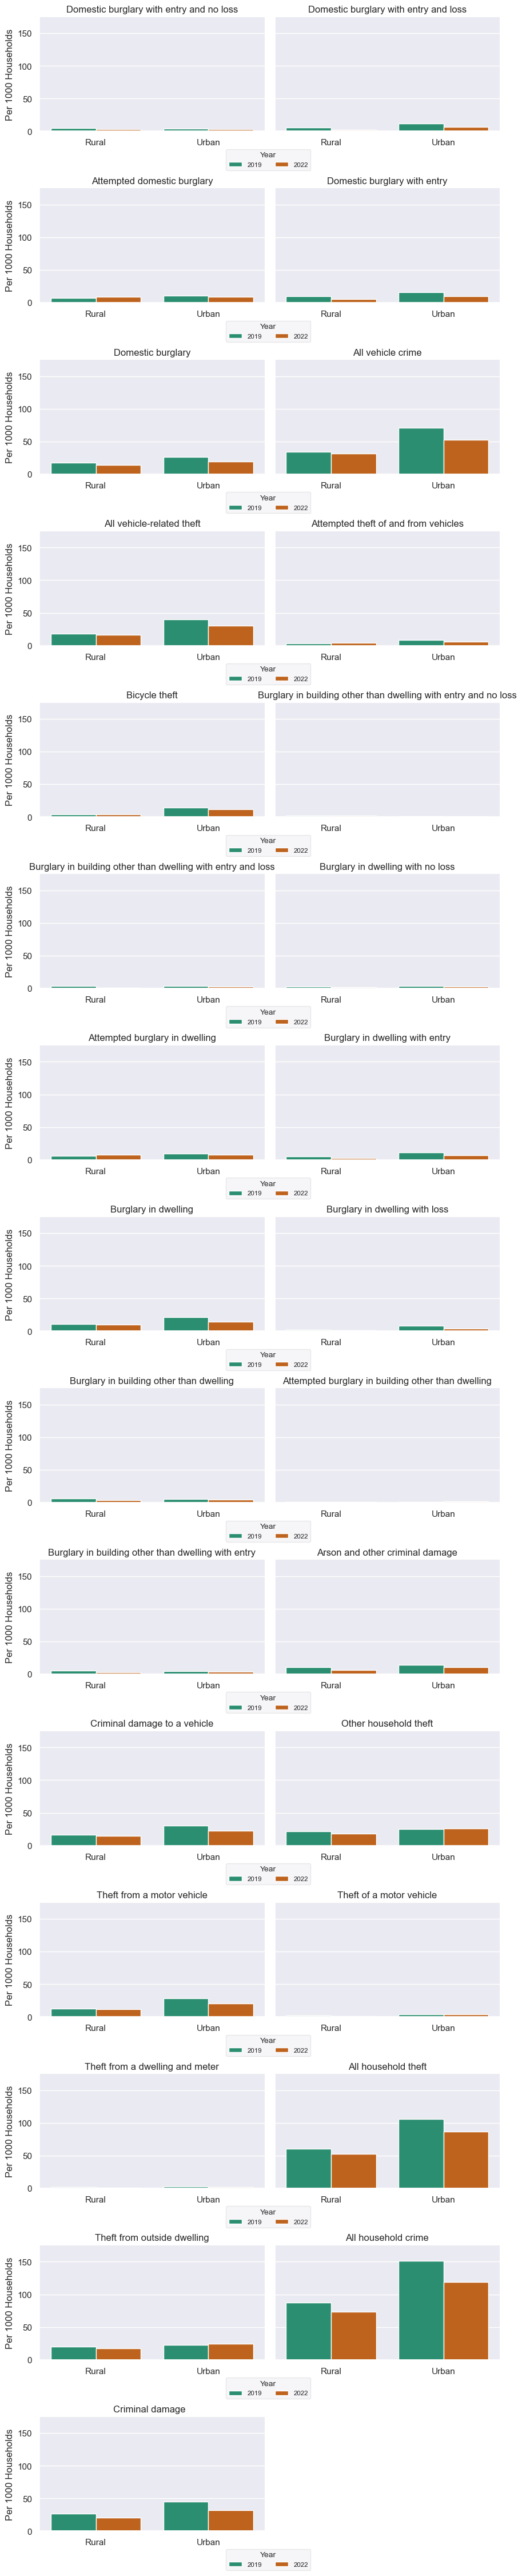

In [45]:
# Visualization of every MeasurementVar on urban/rural areas
all_vars_area = sns.catplot(area_all_households, y="Estimate", 
                            x="Characteristic", kind="bar", col="MeasurementVar", 
                            col_wrap=2, height=3, aspect=1.5, hue="Year",
                            palette="Dark2", sharex=False, sharey=True, legend=None).set(ylim=(0, 175))

all_vars_area.set_titles("{col_name}")
for ax in all_vars_area.axes.flatten()[::2]:
    ax.set_ylabel("Per 1000 Households")
    ax.legend(title="Year", fontsize="x-small", title_fontsize="small",
              framealpha=0.4, loc="center right", bbox_to_anchor=(1.22, -0.25), ncols=4)

for ax in all_vars_area.axes.flatten():
    ax.set_xlabel("")

    
plt.subplots_adjust(hspace=0.5);

In [46]:
# select overall household crime MeasurementVar
area_totals = area_all_households.groupby("MeasurementVar").get_group("All household crime")
area_totals

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2229,2019,All household crime,All households,rural3,Rural,87.384834,5.248151,7646
2230,2019,All household crime,All households,rural3,Urban,151.224620,3.604226,27277
4533,2022,All household crime,All households,rural3,Rural,73.257137,7.079152,5797
4534,2022,All household crime,All households,rural3,Urban,118.965400,4.264908,20516


In [47]:
# separate by year
area_totals_2019 = area_totals.loc[area_totals["Year"] == 2019]
area_totals_2022 = area_totals.loc[area_totals["Year"] == 2022]

In [48]:
# Ae-sthe-tic-s
print(sns.color_palette("Dark2").as_hex())

['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']


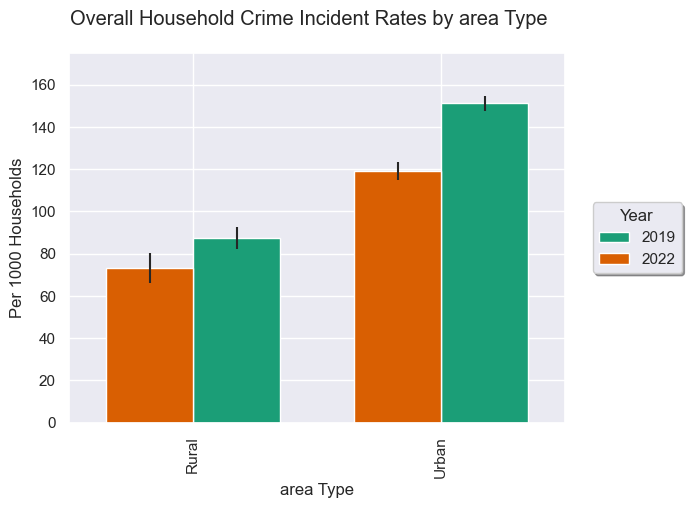

In [49]:
# Plot 2019 and 2022 bars for "All household crime" variable with error bars by area type
fig=plt.figure()
ax = plt.axes()

area_totals_2019.plot.bar(y="Estimate", x="Characteristic", yerr="StandardError", 
                          width=0.35, ax=ax, position=0, color = "#1b9e77", label="2019") 
area_totals_2022.plot.bar(y="Estimate", x="Characteristic", yerr="StandardError", 
                          width=0.35, ax=ax,  position=1, color="#d95f02", label="2022")
plt.xlim([-0.5, 1.5])
ax.legend(title="Year", loc="center right", fancybox=True, shadow=True, bbox_to_anchor=(1.25, 0.5))
ax.set(ylim=(0, 175))
ax.set_xlabel("area Type")
ax.set_ylabel("Per 1000 Households")
    
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Overall Household Crime Incident Rates by area Type", y=0.97, x=0.50);

We have a much smaller standard error associated with the area estimates, and as such the answer to the second question is clearer.

### Variables for Answer:

In [50]:
# Rates, standard error and rates +- standard error for urban areas in 2019
urban_2019 = area_totals_2019.query('Characteristic == "Urban"')
urban_estimate_2019 = int(urban_2019["Estimate"].values)
urban_standard_error_2019 = int(urban_2019["StandardError"].values)
urban_lower_se_2019 = urban_estimate_2019 - urban_standard_error_2019
urban_upper_se_2019 = urban_estimate_2019 + urban_standard_error_2019
urban_2019

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
2230,2019,All household crime,All households,rural3,Urban,151.22462,3.604226,27277


In [51]:
# Rates, standard error and rates +- standard error for urban areas in 2022
urban_2022 = area_totals_2022.query('Characteristic == "Urban"')
urban_estimate_2022 = int(urban_2022["Estimate"].values)
urban_standard_error_2022 = int(urban_2022["StandardError"].values)
urban_lower_se_2022 = urban_estimate_2022 - urban_standard_error_2022
urban_upper_se_2022 = urban_estimate_2022 + urban_standard_error_2022
urban_2022

,Year,MeasurementVar,HouseholdType,CharacteristicVar,Characteristic,Estimate,StandardError,UnweightedCount
4534,2022,All household crime,All households,rural3,Urban,118.9654,4.264908,20516


### Answer:

In [52]:
# Question 2: Answer part 1
print(f"The household crime incidence rate of households in urban areas was \
{urban_estimate_2019} per 1000 households in the year {int(urban_2019['Year'].values)}, with a \nstandard error \
of {urban_standard_error_2019}. Similarly, in {int(urban_2022['Year'].values)}, \
the rate was {urban_estimate_2022} with a standard error of {urban_standard_error_2022}.")

The household crime incidence rate of households in urban areas was 151 per 1000 households in the year 2019, with a 
standard error of 3. Similarly, in 2022, the rate was 118 with a standard error of 4.


In [53]:
# Question 2: Answer part 2
print(f"Clearly, the overall household crime incidence rate in urban areas dropped significantly from \
2019 to 2022. After taking \ninto account the standard error, the highest possible rate in \
2022 was {urban_upper_se_2022}, while the lowest in 2019 was {urban_lower_se_2019}. We can \ntherefore say \
that the household crime incidence rate in urban areas dropped at the very least by \
{urban_upper_se_2022-urban_lower_se_2019/urban_lower_se_2019*100}% from 2019 to 2022.")

Clearly, the overall household crime incidence rate in urban areas dropped significantly from 2019 to 2022. After taking 
into account the standard error, the highest possible rate in 2022 was 122, while the lowest in 2019 was 148. We can 
therefore say that the household crime incidence rate in urban areas dropped at the very least by 22.0% from 2019 to 2022.
